# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1139.
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           3.75e-43
Time:                        12:15:39   Log-Likelihood:                 7.2110
No. Observations:                  50   AIC:                            -6.422
Df Residuals:                      46   BIC:                             1.226
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0991      0.074     68.502      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.62249526  5.02779014  5.40492567  5.73567757  6.00839859  6.21993216
  6.37613097  6.49089541  6.58388977  6.67731147  6.79224403  6.94519319
  7.145375    7.39320167  7.68021384  7.99047045  8.30316778  8.59605747
  8.84910184  9.04776604  9.18540606  9.26436038  9.29556568  9.29676006
  9.28956864  9.29595069  9.33459173  9.41783356  9.54964658  9.72497739
  9.93057913 10.14718782 10.35268747 10.52574358 10.64930841 10.71342184
 10.71684778 10.66727731 10.58006499 10.47570619 10.37646975 10.30273927
 10.26966415 10.28467056 10.34624139 10.44416545 10.5612152  10.67597711
 10.76636993 10.81327251]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.79304876 10.68168047 10.49228138 10.25473608 10.00838317  9.79238384
  9.63613383  9.55206634  9.5326079   9.5520327 ]


## Plot comparison

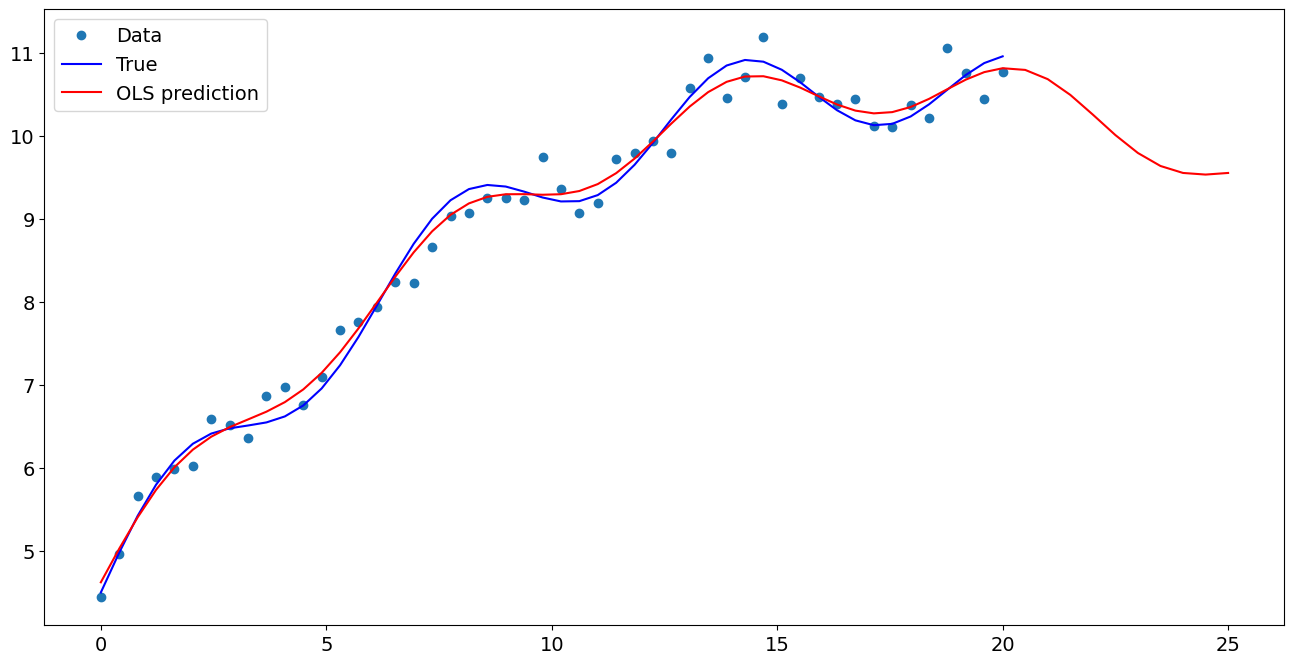

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.099109
x1                  0.484920
np.sin(x1)          0.334396
I((x1 - 5) ** 2)   -0.019065
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.793049
1    10.681680
2    10.492281
3    10.254736
4    10.008383
5     9.792384
6     9.636134
7     9.552066
8     9.532608
9     9.552033
dtype: float64